In [17]:
from simple_back.backtester import BacktesterBuilder
from simple_back.slippage import RandomNormalSlippage
from simple_back.strategy import SellAndHold

builder = (
   BacktesterBuilder()
   .name('Intra-Day VIX')
   .balance(10_000)
   .calendar('NYSE')
   .compare([SellAndHold('^VIX')]) # strategies to compare with
   .live_progress() # show a progress bar using tqdm
   .live_plot() # we assume we are running this in a Jupyter Notebook
   .slippage(0.02)
)

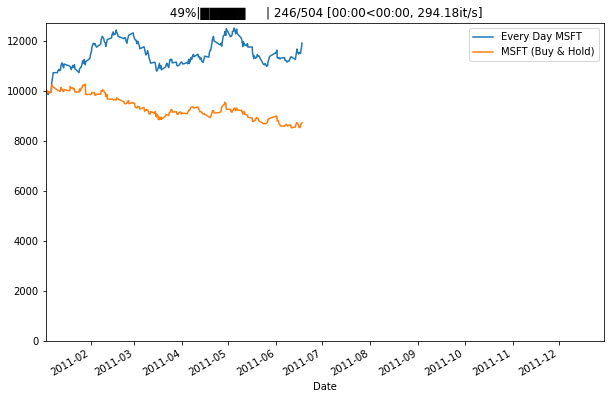

IndexError: list index out of range

In [2]:
bt = builder.build()
for day, event, b in bt['2011-1-1':'2012-1-1']:
    b.pf.liquidate()
    b.long('MSFT', percent=1)

In [4]:
bt.summary

,Max Drawdown,Annual Return,Portfolio Value (Last Value),Total Value (Last Value),Total Return (%) (Last Value),Daily Profit/Loss (Last Value)
Backtest,,,,,,
Every Day MSFT,None,None,13141.497986,13162.049892,31.620499,-96.033459
MSFT (Buy & Hold),None,None,9350.681259,9352.676918,-6.473231,3.594086


In [4]:
import numpy as np

In [15]:
np.random.normal(0, 1)

1.1016325137982763

In [7]:
get_data('MSFT').loc['2010-1-4']

NameError: name 'get_data' is not defined

In [28]:
from simple_back.data_providers import YahooFinanceProvider
from datetime import date

In [29]:
prices = YahooFinanceProvider()

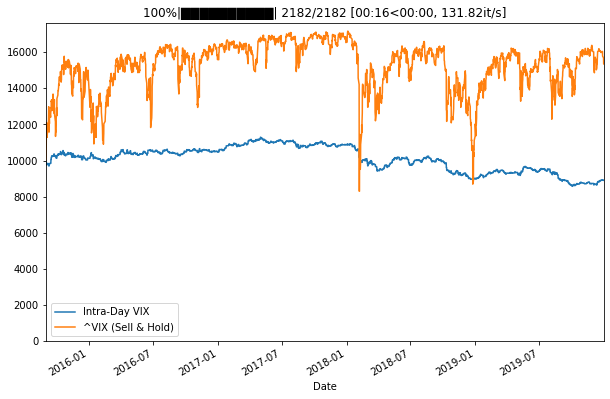

In [45]:
bt = builder.build()
for day, event, b in bt['2015-9-1':'2020-1-1']:
    if event == 'open':
        b.short('^GSPC', percent=.45)
        b.long('ZIV', percent=.45)
    if event == 'close':
        b.pf.short.liquidate()
        b.pf.long.liquidate()

In [49]:
b.prices['MSFT', '2012-3-31']

KeyError: '2012-3-31'

In [56]:
b.prices['MSFT'].loc['2012-3-30']

open     26.752937
close    26.637335
high     26.761192
low      26.455681
Name: 2012-03-30 00:00:00, dtype: float64

In [53]:
import pandas_market_calendars as mcal

In [55]:
mcal.exchange_calendar_nyse.USMemorialDay

Holiday: Memorial Day (month=5, day=25, offset=<DateOffset: weekday=MO(+1)>)